In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Conv2D, Reshape, Flatten, MaxPooling2D, Dropout

In [4]:
ds = pd.read_csv('fer2013.csv')
d = ds.values
d.shape

(35887, 3)

In [5]:
arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
c = np.array([7, 8 ,9])
arr = np.vstack((arr, c))
#print arr

x = [1, 2, 3]
y = [4, 5, 6]

p = np.array(x)
print(p)

print(x)

[1 2 3]
[1, 2, 3]


In [6]:
labels = d[:, 0]
print(labels.shape)

tem = d[:, 1]
pixels = np.zeros((d.shape[0], 48*48))
# t = d[0, 1]
# t = t.split()
# t = [ int(z) for z in t ]
# data1 = np.array(t)
# print data1

# for ix in range(1, d.shape[0]):
#     tem = d[ix, 1]
#     tem = tem.split()
#     tem = [ int(z) for z in tem ]
#     data = np.vstack((data, np.array(tem)))

for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])


(35887,)


In [7]:
print(pixels.shape)
    
print(pixels[:2, :10])

#normalize #data preprocessing
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)

print(pixels[:2, :10])

(35887, 2304)
[[ 70.  80.  82.  72.  58.  58.  60.  63.  54.  58.]
 [151. 150. 147. 155. 148. 133. 111. 140. 170. 174.]]
[[-0.60646962 -0.4562069  -0.4011047  -0.50456157 -0.67067463 -0.66569461
  -0.6410465  -0.60871772 -0.75621507 -0.73092633]
 [ 0.37587539  0.40796695  0.41422283  0.55721626  0.50643161  0.33794788
   0.05679587  0.46676644  0.89310809  0.94130151]]


In [8]:
y = keras.utils.to_categorical(labels)
print(y.shape)

(35887, 7)


In [9]:
split = int(0.80*pixels.shape[0])

x_train = pixels[:split]
y_train = y[:split]

x_test = pixels[split:]
y_test = y[split:]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(28709, 2304) (7178, 2304)
(28709, 7) (7178, 7)


In [10]:
x_train = x_train.reshape((x_train.shape[0], 48, 48,1))
x_test = x_test.reshape((x_test.shape[0], 48, 48,1))

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(28709, 48, 48, 1) (7178, 48, 48, 1)
(28709, 7) (7178, 7)


In [23]:
conv_model = keras.models.Sequential()

conv_model.add(Conv2D(64, (3, 3), input_shape=(48, 48,1), activation='relu'))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(512, activation='relu'))
conv_model.add(Dropout(0.25))
conv_model.add(Dense(128, activation='relu'))
conv_model.add(keras.layers.Dense(7,activation='softmax'))
conv_model.summary()
#keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt=keras.optimizers.Adam(lr=0.001)
conv_model.compile(loss='categorical_crossentropy', optimizer=opt,
                  metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 19, 19, 32)        18464     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 15, 15, 32)       

In [15]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9971372936647256401
]


In [24]:
hist = conv_model.fit(x_train, y_train,
                     epochs=20,
                     shuffle=True,
                      batch_size=256,
                     validation_data=(x_test, y_test))

Epoch 1/20
113/113 [==============================] - 257s 2s/step - loss: 1.7036 - accuracy: 0.3155 - val_loss: 1.5438 - val_accuracy: 0.4061
Epoch 2/20
113/113 [==============================] - 282s 2s/step - loss: 1.4539 - accuracy: 0.4376 - val_loss: 1.3887 - val_accuracy: 0.4719
Epoch 3/20
113/113 [==============================] - 304s 3s/step - loss: 1.3115 - accuracy: 0.4964 - val_loss: 1.2643 - val_accuracy: 0.5135
Epoch 4/20
113/113 [==============================] - 255s 2s/step - loss: 1.1944 - accuracy: 0.5455 - val_loss: 1.2469 - val_accuracy: 0.5265
Epoch 5/20
113/113 [==============================] - 244s 2s/step - loss: 1.0901 - accuracy: 0.5891 - val_loss: 1.2105 - val_accuracy: 0.5398
Epoch 6/20
113/113 [==============================] - 245s 2s/step - loss: 0.9751 - accuracy: 0.6365 - val_loss: 1.1984 - val_accuracy: 0.5418
Epoch 7/20
113/113 [==============================] - 258s 2s/step - loss: 0.8682 - accuracy: 0.6760 - val_loss: 1.2943 - val_accuracy: 0.5522

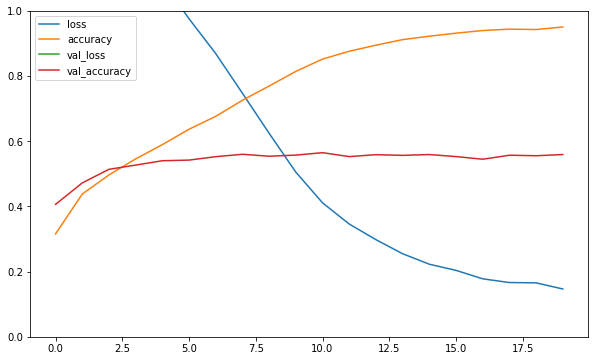

In [25]:
pd.DataFrame(hist.history).plot(figsize=(10,6))
plt.grid(False)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). 

In [27]:
conv_model.save('Recsys.h5')

In [29]:
conv_model.save_weights('rec_weights.h5')

In [30]:
test = np.zeros((d.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

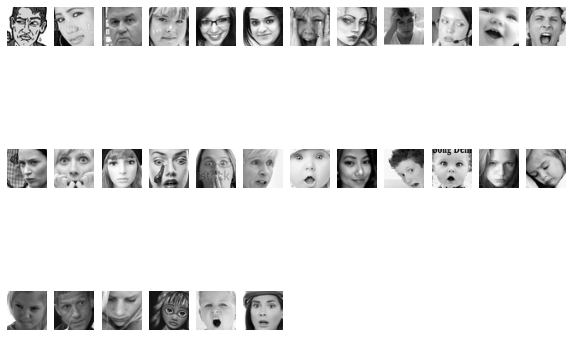

In [31]:
fig = plt.figure(figsize=(10,10))

for ix in range(30):
    ax = plt.subplot(4,12,ix+1)
    ax.set_title = ix
    plt.imshow(test[split+ix].reshape((48, 48)), cmap='gray')
    plt.axis('off')

In [34]:
pre = x_test[:100]
print(pre.shape)
ans = conv_model.predict(pre, batch_size=3)

correct=0
for ix in range(100):
    if np.argmax(ans[ix]) == np.argmax(y_test[ix]):
        correct += 1
        
print(correct)

(100, 48, 48, 1)
54


In [37]:
model = tf.keras.models.load_model('Recsys.h5')

In [79]:
x_test_reshaped = x_test[0].reshape(1,48,48,1)

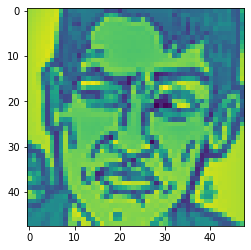

In [77]:
plt.imshow(x_test[0])

In [80]:
model.predict_classes(x_test_reshaped)

array([0], dtype=int64)